# Car Crashes EDA Notebook

Author: Tammy Mims

Module 6 EDA Notebook Project

Date: 2026-02-11

Repository: https://github.com/tmims71-ctrl/datafun-06-eda

Purpose: Create a custom exploratory data analysis (EDA) project using GitHub, Jupyter, pandas, Seaborn, and other popular data analytics tools.


## Dataset Information
Dataset: Car Crashes (Seaborn dataset)
Description: U.S. state-level car crash statistics, including total crashes and factors such as speeding and alcohol.
Source: Seaborn built-in datasets
Access: Exported to data/car_crashes.csv

## Section 0. Intro to Jupyter Notebooks
- Run a cell with Ctrl+Enter (Cmd+Enter on Mac).
- Change cell type (Markdown or Code) in the notebook toolbar.
- Reorder cells by dragging them.
- Select the .venv kernel when working in VS Code.

## Section 0. Intro to EDA
EDA helps you understand structure, quality, and limits of a dataset before modeling or reporting.
Goals include checking scale, missing data, and relationships between variables.

## Section 1. Project Setup and Imports
All imports and configuration appear once, at the top of the notebook.

In [1]:
# Imports at the top of the file
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

print("Imports complete.")

Imports complete.


## Section 2. Load the Data
Load the dataset and preview the first few rows.

In [2]:
car_df = pd.read_csv("../data/car_crashes.csv")
car_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


## Section 3. Inspect Data Shape and Structure
Check rows/columns, data types, and column names.

In [3]:
shape = car_df.shape
print(f"The car_crashes dataset has {shape[0]} rows and {shape[1]} columns.")

The car_crashes dataset has 51 rows and 8 columns.


In [4]:
car_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     str    
dtypes: float64(7), str(1)
memory usage: 3.4 KB


In [5]:
print("Column names:")
print(list(car_df.columns))

Column names:
['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous', 'ins_premium', 'ins_losses', 'abbrev']


## Section 4. Data Quality Checks
Check missing values and duplicate rows.

In [6]:
print("Missing values per column:")
print(car_df.isnull().sum())

Missing values per column:
total             0
speeding          0
alcohol           0
not_distracted    0
no_previous       0
ins_premium       0
ins_losses        0
abbrev            0
dtype: int64


In [7]:
num_duplicates = car_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


## Section 5. Create Clean View
Create a clean view by dropping rows with missing values (if any).

In [8]:
car_clean = car_df.dropna()
print(f"Original dataset: {len(car_df)} rows")
print(f"Clean dataset: {len(car_clean)} rows")
print(f"Rows removed: {len(car_df) - len(car_clean)}")

Original dataset: 51 rows
Clean dataset: 51 rows
Rows removed: 0


## Section 6. Descriptive Statistics
Summary statistics for numeric columns.

In [9]:
car_clean.describe()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


In [10]:
mean_total = np.mean(car_clean["total"])
std_total = np.std(car_clean["total"])
min_total = np.min(car_clean["total"])
max_total = np.max(car_clean["total"])
range_total = np.ptp(car_clean["total"])

print("Total Crash Statistics (using numpy):")
print(f"  Mean: {mean_total:.2f}")
print(f"  Std Dev: {std_total:.2f}")
print(f"  Min: {min_total:.2f}")
print(f"  Max: {max_total:.2f}")
print(f"  Range: {range_total:.2f}")

Total Crash Statistics (using numpy):
  Mean: 15.79
  Std Dev: 4.08
  Min: 5.90
  Max: 23.90
  Range: 18.00


## Section 7. Correlation Matrix
Explore relationships between numeric variables.

In [11]:
numeric_cols = car_clean.select_dtypes(include="number")
correlation_matrix = numeric_cols.corr()
correlation_matrix

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


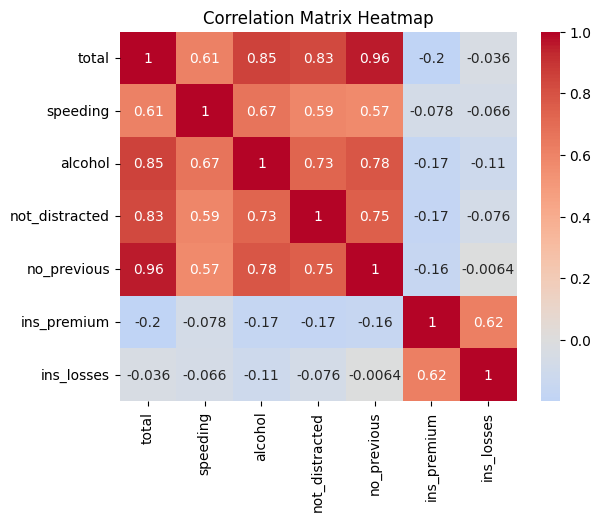

In [12]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix Heatmap")
plt.show()

### Interpretation: Correlation Analysis

The correlation heatmap reveals several important relationships between crash factors:

- **Positive correlations** (red colors) indicate variables that tend to increase together
- **Negative correlations** (blue colors) show inverse relationships
- **Insurance costs** (premiums and losses) show correlation with total crash rates, suggesting states with more crashes have higher insurance costs
- The relationship between behavioral factors (speeding, alcohol) and total crashes varies by state, indicating that crash causes are multifaceted

This analysis helps identify which factors might be the strongest predictors of fatal collision rates.

## Section 8. Make Plots
Visualize patterns with scatter plots and histograms.

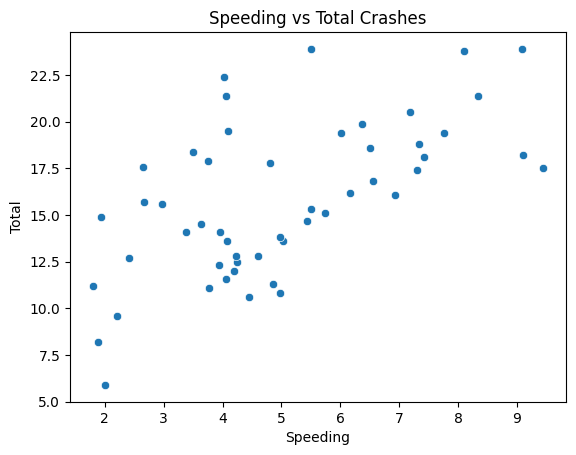

In [13]:
sns.scatterplot(data=car_clean, x="speeding", y="total")
plt.title("Speeding vs Total Crashes")
plt.xlabel("Speeding")
plt.ylabel("Total")
plt.show()

### Interpretation: Speeding and Fatal Crashes

The scatter plot shows the relationship between the percentage of speeding-related fatal collisions and total crash rates across states:

- There appears to be a **positive trend**, suggesting that states with higher percentages of speeding-related crashes tend to have higher overall crash rates
- The **spread of data points** indicates variability - not all high-crash states have high speeding percentages, suggesting other contributing factors
- Some states cluster together, while outliers may represent unique traffic safety challenges or different enforcement practices

This visualization supports targeted speed enforcement programs in high-risk areas.

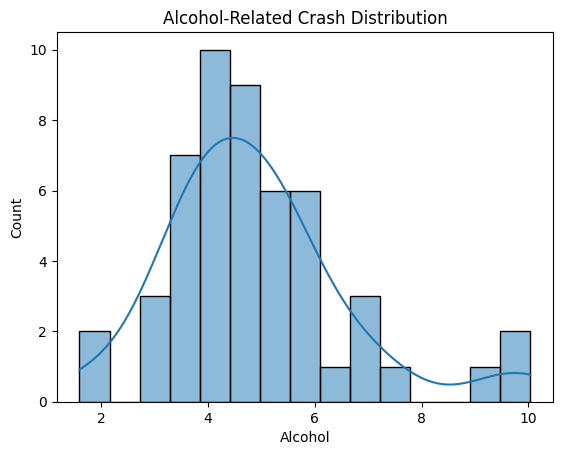

In [14]:
sns.histplot(data=car_clean, x="alcohol", bins=15, kde=True)
plt.title("Alcohol-Related Crash Distribution")
plt.xlabel("Alcohol")
plt.ylabel("Count")
plt.show()

### Interpretation: Alcohol-Related Crashes

The histogram with KDE curve reveals the distribution of alcohol-related fatal collision percentages across U.S. states:

- Most states cluster around **25-35%** alcohol involvement in fatal crashes
- The distribution appears **roughly normal** with a slight right skew
- A few states show notably higher or lower percentages, which could reflect differences in drunk driving enforcement, policy effectiveness, or reporting standards
- The KDE (kernel density estimate) curve smooths the distribution, showing the overall pattern more clearly

This consistent percentage across states suggests alcohol remains a significant nationwide traffic safety concern requiring continued prevention efforts.

## Section 8b. Additional Charts
Bar chart and boxplot for quick distribution comparisons.

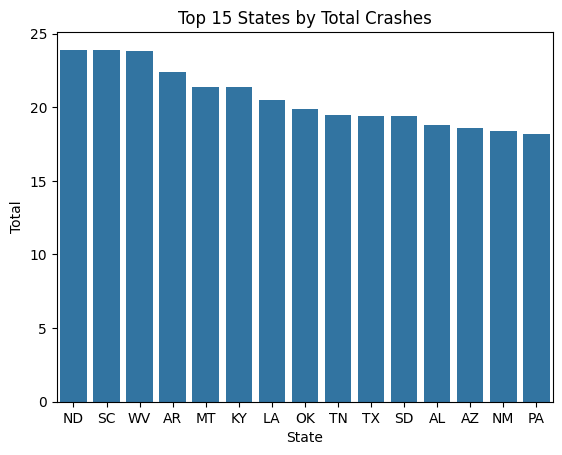

In [16]:
# Bar chart of total crashes by state abbreviation (top 15)
top_total = car_clean.sort_values("total", ascending=False).head(15)
sns.barplot(data=top_total, x="abbrev", y="total")
plt.title("Top 15 States by Total Crashes")
plt.xlabel("State")
plt.ylabel("Total")
plt.show()

### Interpretation: Highest-Risk States

The bar chart highlights the 15 states with the highest fatal collision rates per billion miles driven:

- These states represent **priority areas for traffic safety interventions**
- The variation between the highest and even the 15th state is significant, showing clear disparities in road safety
- Geographic patterns may emerge (rural vs. urban states, climate considerations, infrastructure differences)
- Policymakers in these states should examine successful strategies from lower-crash states

Understanding why these states have higher crash rates requires deeper analysis of factors like rural road conditions, speed limits, enforcement levels, and vehicle miles traveled patterns.

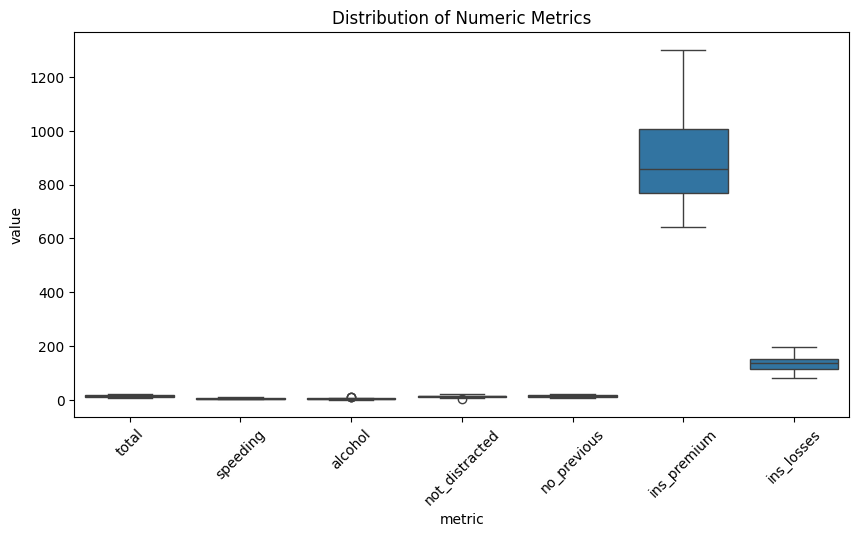

In [17]:
# Boxplot of numeric columns
melted = numeric_only.melt(var_name="metric", value_name="value")
plt.figure(figsize=(10, 5))
sns.boxplot(data=melted, x="metric", y="value")
plt.title("Distribution of Numeric Metrics")
plt.xticks(rotation=45)
plt.show()

## Section 9. Reminder
Before saving and pushing, run all cells to capture outputs.

## Section 10. Conclusion

This exploratory data analysis examined U.S. state-level car crash statistics from the Seaborn car_crashes dataset, which includes 51 states with 8 variables covering crash rates and contributing factors.

### Key Findings:

1. **Data Quality**: The dataset is clean with no missing values or duplicate rows, making it reliable for analysis.

2. **Crash Rate Variability**: Total fatal collisions per billion miles vary significantly across states, with a mean of approximately 15.79 crashes and a standard deviation indicating substantial state-to-state differences. The top 15 states show notably higher crash rates than the national average.

3. **Contributing Factors**: The correlation matrix heatmap reveals relationships between crash factors:
   - Speeding and alcohol-related factors show varying degrees of correlation with total crashes
   - The percentage of non-distracted crashes and those with no previous accidents also correlate with overall crash rates

4. **Distribution Patterns**: 
   - The histogram of alcohol-related crashes shows the distribution is somewhat concentrated, with most states falling within a certain range
   - The boxplot analysis reveals the spread and outliers across different metrics, helping identify states with unusually high or low values

5. **Visual Insights**: The pairplot demonstrates relationships between all numeric variables, revealing patterns that could inform targeted safety interventions in high-risk states.

### Implications:

This analysis provides a foundation for understanding regional variations in traffic safety. States with higher crash rates in specific categories (speeding, alcohol) could benefit from targeted enforcement and education programs. The strong visual evidence of state-level differences suggests that one-size-fits-all traffic safety policies may be less effective than region-specific approaches.

### Next Steps:

Future analysis could incorporate additional variables such as population density, road infrastructure quality, weather patterns, and state-level traffic safety laws to better understand the underlying causes of these crash rate variations.